In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_42942_R')

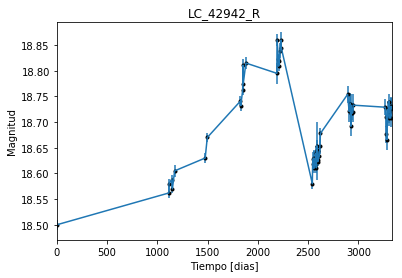

In [2]:
data = np.genfromtxt('LC_42942_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_42942_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

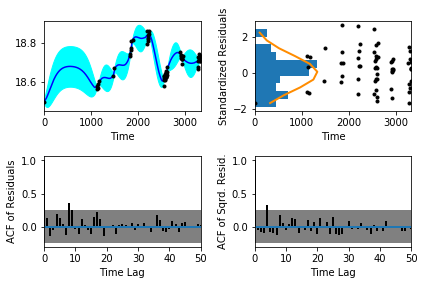

In [5]:
sample.assess_fit()

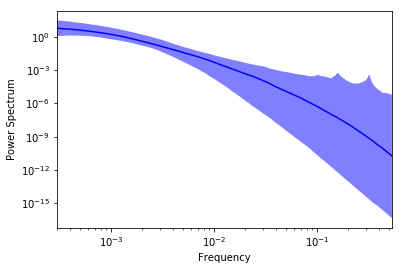

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_42942_R')

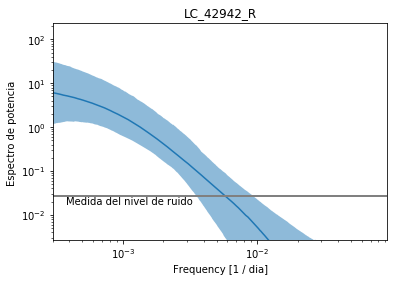

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_42942_R')

Text(0.5,1,'Prediccion , valor esperado LC_42942_R')

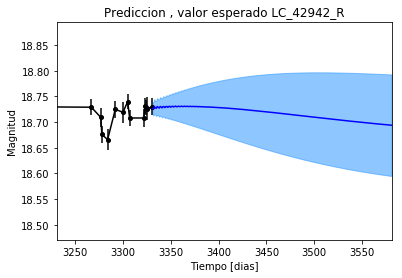

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_42942_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_42942_R')

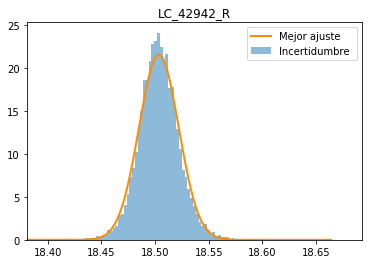

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_42942_R')

Text(0.5,1,'Interpolacion, camino simulado LC_42942_R')

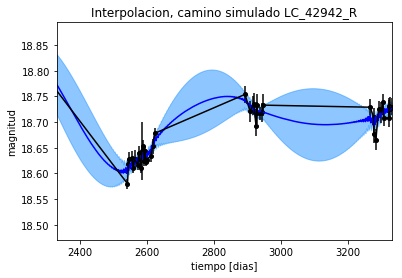

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42942_R')

Text(0.5,1,'Interpolacion, camino simulado LC_42942_R')

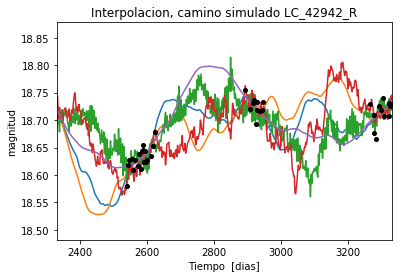

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42942_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 288.334206752
Median: 0.0109878102684
Standard deviation: 0.19087210689
68% credibility interval: [ 0.0010473   0.16113321]
95% credibility interval: [  3.70721736e-04   7.53660138e-01]
99% credibility interval: [  3.16212739e-04   1.00101268e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 297.573311293
Median: 0.00351586728893
Standard deviation: 0.105893340277
68% credibility interval: [ 0.00054631  0.03313681]
95% credibility interval: [ 0.00033131  0.31418862]
99% credibility interval: [  3.05930618e-04   7.75378011e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 555.527614614
Median: 0.0180578017829
Standard de

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 415.154963906
Median: 166.146616486
Standard deviation: 1.94812653077
68% credibility interval: [ 164.25955766  167.83132764]
95% credibility interval: [ 161.82393879  169.84029792]
99% credibility interval: [ 159.89104693  170.90639179]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 583.236182858
Median: 0.689234934501
Standard deviation: 2.28006429397
68% credibility interval: [ 0.06435157  3.77315683]
95% credibility interval: [ 0.01960938  7.87672693]
99% credibility interval: [  0.01272423  11.48875045]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 783.300553128
Median: 0.960969278232
Standard deviation: 9.86708475694
68% credibility interval: [ 0.04413248  9.37502694]
95% credibility interval: [  4.38289945e

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12629.3017199
Median: 1.75500767908e-14
Standard deviation: 7.71042960818e+65
68% credibility interval: [  1.15761195e-35   1.14570581e-01]
95% credibility interval: [  7.18434316e-82   9.21637499e+31]
99% credibility interval: [  2.09706827e-91   1.38815776e+51]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2020.06143292
Median: 18.6676632089
Standard deviation: 0.0619872851452
68% credibility interval: [ 18.60515128  18.71457527]
95% credibility interval: [ 18.5356695   18.77498881]
99% credibility interval: [ 18.46855457  18.82730256]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 293.1050801
Median: 0.0722147095517
Standard deviation: 0.245240452272
68% credibility interval: [ 0.        0.392027]
95% credibility interval: [ 0.          0.88389926]
99% credibility interval: [ 0.          1.01170236]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 293.1050801
Median: 0.0722147095517
Standard deviation: 0.245240452272
68% credibility interval: [ 0.        0.392027]
95% credibility interval: [ 0.          0.88389926]
99% credibility interval: [ 0.          1.01170236]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1036.18556618
Median: 0.0
Standard deviation: 0.000352425453025
68% credibility in

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 415.154963906
Median: 166.146616486
Standard deviation: 1.94812653077
68% credibility interval: [ 164.25955766  167.83132764]
95% credibility interval: [ 161.82393879  169.84029792]
99% credibility interval: [ 159.89104693  170.90639179]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1622.74507562
Median: 0.0128293691048
Standard deviation: 0.0170902883533
68% credibility interval: [ 0.00781376  0.0246142 ]
95% credibility interval: [ 0.0051541   0.05331501]
99% credibility interval: [ 0.00426226  0.10018661]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 725.768032346
Median: 1.28735907722
Standard deviation: 0.259344136991
68% credibility interval: [ 1.0162585   1.56130467]
95% credibility interval: [ 0.82772011  1.80904868]
99% credibility interval: [ 0.72625964  1.93399185]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 367.272733497
Median: 0.000292970054113
Standard deviation: 0.110451961064
68% credibility interval: [  6.12656180e-06   1.05326295e-02]
95% credibility interval: [  1.42760467e-35   2.34557485e-01]
99% credibility interval: [  4.97675284e-56   8.32678294e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 288.334206752
Median: (-0.0690384480368-2.13206028858j)
Standard deviation: 1.9525956529
68% credibility interval: [-1.01242984+0.j        -0.00658038-0.1636579j]
95% credibility interval: [ -4.73538631e+00+0.j         -2.32931337e-03-1.0248032j]
99% credibility interval: [ -6.28954818e+00+0.j          -1.98682324e-03-5.60142419j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 297.573311293
Median: (-0.0220908456918+1.43659445742j)
Standard deviation: 1.67840191221
68% credibility interval: [-0.20820472+1.95415607j -0.00343258+0.98999895j]
95% credibility interval: [-1.97410532+3.29203891j -0.00208167+0.j        ]
99% credibility interval: [ -4.87184373e+00+3.88926477j  -1.92221876e-03+0.j        ]
Posterior summary f